In [15]:
import numpy as np
import pandas as pd
import pyreadr
import matplotlib.pyplot as plt

In [2]:
# Import necessary libraries
#import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
import tensorflow as tf

## Question 1
Smart health and fitness monitoring devices (for example, created by FitBit, Nike, Adidas, Misfit Shine, . . . ) are very popular. They are also useful for analyzing person’s daily physical activities and recommending health-enhancing exercises. At their core, how do these devices work? Before analyzing human activities, the first thing the device needs to do is to recognize which activities are being performed in the first place. <br>

This experiment1 monitors people carrying Samsung Galaxy smartphones. Measurements are collected using the phones’ accelerometers and gyroscopes, while subjects perform 6 different activites:
- WALKING
- WALKING_UPSTAIRS
- WALKING_DOWNSTAIRS • SITTING
- STANDING
- LAYING

Your task is to classify person’s activity based on the phones recordings. <br>
The preprocessed data has been cleaned and normalized, so you are not expected to do any further cleaning. <br>
load('HumanActivityRecognition.RData')

### Your tasks:
1. Build a Neural Network model to classify the 6 activity patterns and report your Accuracy on the Test set
2. Build a tree-based model (or a few) to do the same thing. Compare accuracy on the test set with that of Neural Networks.

#### Loading the RData file on python using pyreadr

In [37]:
# Load RData file
data = pyreadr.read_r('HumanActivityRecognition.RData')

X_train, y_train = data['Xtrain'], data['Ytrain']
X_test, y_test = data['Xtest'], data['Ytest']

#### Setting index columns

In [38]:
X_train.set_index('X', inplace=True)
X_test.set_index('X', inplace=True)
y_train.set_index('X', inplace=True)
y_test.set_index('X', inplace=True)

#### Converting the labels to categorical variables and then one-hot encoding them

In [39]:
# Convert activity labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create a dictionary to map encoded labels to original labels
label_map = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))


# Convert integer labels to one-hot encoded vectors
y_train_onehot = np_utils.to_categorical(y_train_encoded)
y_test_onehot = np_utils.to_categorical(y_test_encoded)


/Users/amankrishna/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/amankrishna/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Implementing the Neural Network model using Keras Sequential API and printing the Accuracy on the Test set

#### Neural Network model setup and parameters used
> **Sequential()**: This creates an instance of the Keras sequential model.
> 
> **Dense(64, input_dim=X_train.shape[1], activation='relu')**: This adds a fully connected layer with **64 neurons** to the model. **input_dim** specifies the number of input features (i.e., the number of columns in the X_train array). <br>
> **activation='relu'** specifies the ReLU activation function, which is commonly used in deep learning models.
>
> **Dropout(0.5)**: This adds a dropout layer with a dropout rate of 0.5, which randomly sets 50% of the inputs to 0 during training to prevent overfitting.
>
> **Dense(32, activation='relu')**: This adds another fully connected layer with 32 neurons to the model, using the ReLU activation function.
>
> **model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])**: This compiles the model, specifying the loss function to be categorical cross-entropy, the optimizer to be Adam, and the evaluation metric to be accuracy.
> - The loss function specifies how to measure the difference between the predicted and true values during training. For classification problems with multiple classes (like the Human Activity Recognition dataset), categorical cross-entropy is a commonly used loss function. It measures the difference between the true class label (one-hot encoded) and the predicted probability distribution over the classes.
> - The optimizer specifies how to update the model parameters during training based on the loss function. Adam is a popular optimizer that uses a combination of adaptive learning rate methods and momentum to speed up convergence and prevent getting stuck in local minima.
> - The evaluation metric specifies how to measure the performance of the model on the validation set during training. In this case, we are using accuracy, which measures the proportion of correctly classified instances out of all instances.
> 
> **model.fit(X_train, y_train_onehot, epochs=40, batch_size=128, validation_data=(X_test, y_test_onehot), verbose=1)**: This trains the model on the training data (X_train and y_train_onehot) for 40 epochs, using a batch size of 128. The validation_data parameter specifies the validation set to use during training. verbose=1 specifies that progress updates should be displayed during training.
> - During training, the model is updated using the training data in batches. After each **epoch** (i.e., one full pass through the training data), the model's performance on the validation set is evaluated using the specified evaluation metric. This gives an estimate of how well the model will generalize to new, unseen data.
> - In the above case, the model is trained for 40 epochs using a batch size of 128. This means that the model is **updated 128 times per iteration** (i.e., weight update) using 128 randomly sampled training instances.
> - The validation_data parameter specifies the validation set to use during training, which is the X_test and y_test data that were preprocessed earlier. The validation set is used to monitor the model's performance on unseen data during training and prevent overfitting. 

In [40]:
# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_onehot, epochs=40, batch_size=128, validation_data=(X_test, y_test_onehot), verbose=1)

loss, accuracy = model.evaluate(X_test, y_test_onehot, batch_size=128)
print('Test accuracy:', accuracy)
print('Test loss:', loss)

Epoch 1/40
58/58 [==============================] - 1s 4ms/step - loss: 1.4520 - accuracy: 0.3860 - val_loss: 0.9290 - val_accuracy: 0.7618
Epoch 2/40
58/58 [==============================] - 0s 1ms/step - loss: 0.9609 - accuracy: 0.5994 - val_loss: 0.5525 - val_accuracy: 0.8191
Epoch 3/40
58/58 [==============================] - 0s 2ms/step - loss: 0.6990 - accuracy: 0.7108 - val_loss: 0.4101 - val_accuracy: 0.8371
Epoch 4/40
58/58 [==============================] - 0s 1ms/step - loss: 0.5657 - accuracy: 0.7613 - val_loss: 0.3475 - val_accuracy: 0.8310
Epoch 5/40
58/58 [==============================] - 0s 1ms/step - loss: 0.4835 - accuracy: 0.7938 - val_loss: 0.3078 - val_accuracy: 0.8962
Epoch 6/40
58/58 [==============================] - 0s 1ms/step - loss: 0.4290 - accuracy: 0.8203 - val_loss: 0.2661 - val_accuracy: 0.8972
Epoch 7/40
58/58 [==============================] - 0s 1ms/step - loss: 0.3895 - accuracy: 0.8381 - val_loss: 0.2390 - val_accuracy: 0.9226
Epoch 8/40
58/58 [==

#### Creating Accurancy and Loss plots along with the Confusion Matrix

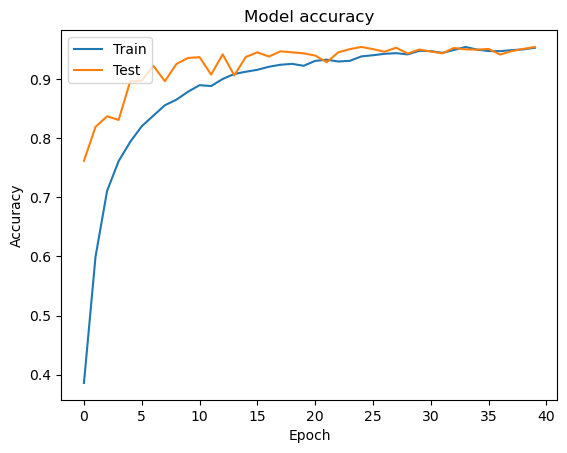

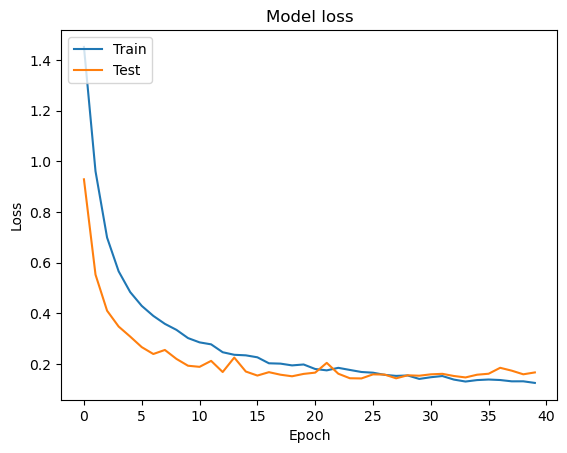

93/93 [==============================] - 0s 404us/step


/Users/amankrishna/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


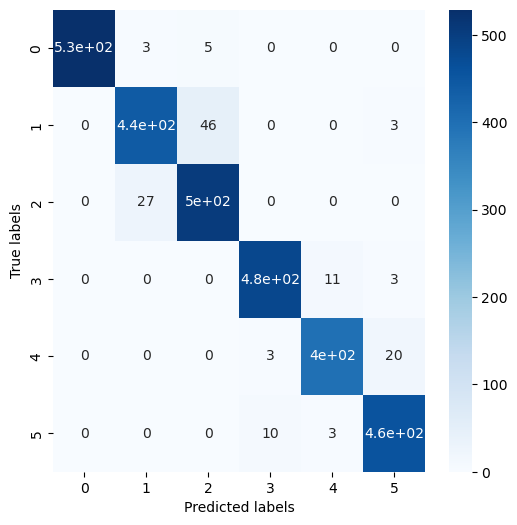

In [55]:
# plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Get predictions on test set
y_pred_onehot = model.predict(X_test)
y_pred_encoded = np.argmax(y_pred_onehot, axis=1)
y_pred = [label_map[label] for label in y_pred_encoded]
y_test_encoded = label_encoder.transform(y_test)

# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


#### Plotting the Confusion Matrix with Labels below

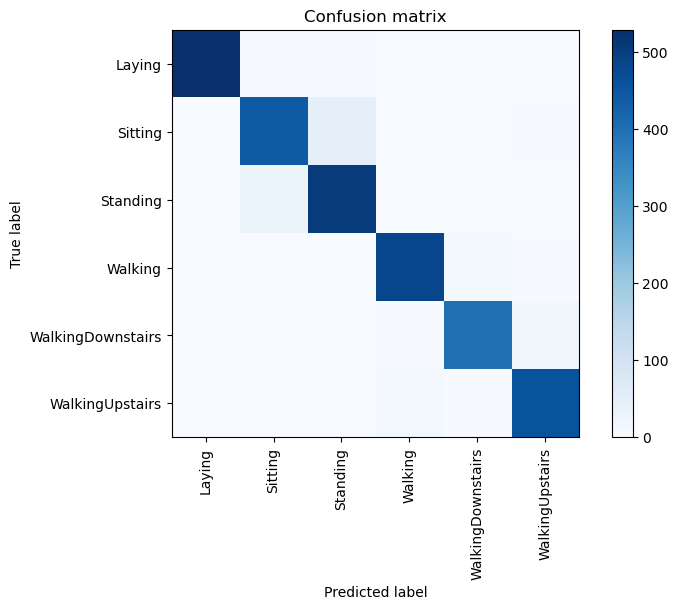

In [56]:
#plot a confusion matrix of y_test and y_pred
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred, labels=label_encoder.classes_)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(label_encoder.classes_))
plt.xticks(tick_marks, label_encoder.classes_, rotation=90)
plt.yticks(tick_marks, label_encoder.classes_)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()